<a href="https://colab.research.google.com/github/18K41A0256/NNDL/blob/main/Assignment%2010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from random import shuffle
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split

In [3]:
load_data = pd.read_excel("/content/Load Data in kW (6).xlsx")
load_data.head()

,5551.82208
0,4983.17184
1,4888.39680
2,5072.95872
3,5196.25980
4,5641.29720


In [4]:
load_data.describe()

,5551.82208
count,2183.000000
mean,6393.616060
std,17143.020064
min,3377.919600
25%,5257.520640
50%,5935.910400
75%,6738.692400
max,805444.430400


In [5]:
load_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2183 entries, 0 to 2182
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   5551.82208  2183 non-null   float64
dtypes: float64(1)
memory usage: 17.2 KB


{'boxes': [<matplotlib.lines.Line2D at 0x7fde69f7ef10>],
 'caps': [<matplotlib.lines.Line2D at 0x7fde69f2ee90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fde69f3ded0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fde69f3d990>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fde69f2e410>,
  <matplotlib.lines.Line2D at 0x7fde69f2e950>]}

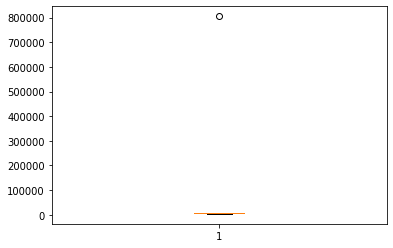

In [6]:
plt.boxplot(load_data.iloc[:,0])

In [7]:
from scipy import stats

z = np.abs(stats.zscore(load_data.iloc[:,0]))

threshold = 3
print(np.where(z > 3))

(array([928]),)


In [8]:
load_data.iloc[928,0] = load_data.iloc[927,0]

{'boxes': [<matplotlib.lines.Line2D at 0x7fde698f3ad0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fde698f9a90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fde6987fad0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fde6987f590>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fde698f3fd0>,
  <matplotlib.lines.Line2D at 0x7fde698f9550>]}

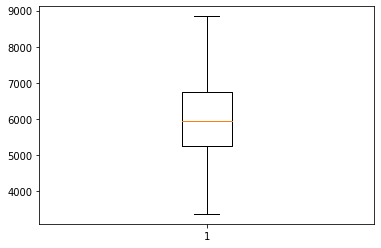

In [9]:
plt.boxplot(load_data.iloc[:,0])

In [10]:
x = []
y = []
for i in range(len(load_data.iloc[:,0])-24):
  x.append(load_data.iloc[i,0])
  y.append(load_data.iloc[i+24,0])

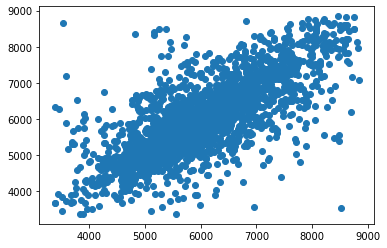

In [11]:
plt.scatter(x,y)

In [12]:
def error(d,m,c):
  sum = 0
  for i in range(len(d)):
    sum = sum + math.pow(d[i][1]-m*d[i][0]-c,2)
  return 0.5*sum/len(d)

def gradm(d,m,c):
  sum = 0
  for i in range(len(d)):
    sum = sum + (d[i][1]-m*d[i][0]-c)*d[i][0]
  return -1*sum/len(d)

def gradc(d,m,c):
  sum = 0
  for i in range(len(d)):
    sum = sum + (d[i][1]-m*d[i][0]-c)
  return -1*sum/len(d)

In [17]:
learning_rate = 0.01
epochs = 20

m = 1
c = 1

v_m = 0
v_c = 0
momentum_coeff = 0.9

batch_size = 500

In [18]:
x = minmax_scale(x)
y = minmax_scale(y)

In [23]:
print(m,c)

1 1


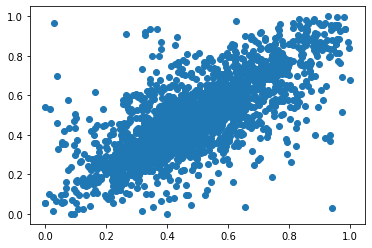

In [24]:
plt.scatter(x,y)

Text(0.5, 1.0, 'predicted line')

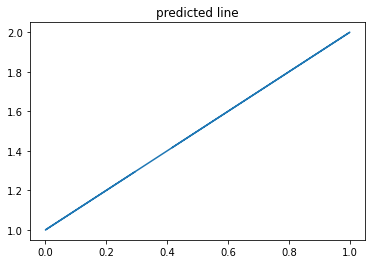

In [25]:
x1 = x
y1 = [i*m+c for i in x1]
plt.plot(x1,y1)
plt.title("predicted line")

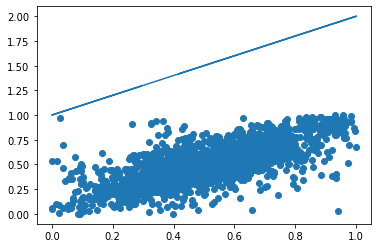

In [26]:
plt.scatter(x,y)
x1 = x
y1 = [i*m+c for i in x1]
plt.plot(x1,y1)

In [27]:
input_load = float(input("enter yesterday load at this time : "))

max_value = 8841.669480
min_value = 3377.919600

input_load = (input_load - min_value)/(max_value-min_value)
output_load = input_load*m+c

output_load = output_load*(max_value-min_value)+min_value

print("predicted load for this hour is : ",output_load)

enter yesterday load at this time : 4485
predicted load for this hour is :  9948.749880000001
